In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import random

# Load the Excel file
sample_name_table = pd.read_csv("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/data/metagenome/metagenome_sample_names.tsv", 
                                sep="\t", index_col="metagenome_name")
data = pd.read_excel("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/data/metagenome/bacteria_abundance_normalized.xlsx")

# Remove the 's__' prefix from species names in 'ln_species'
data["ln_species"] = data["ln_species"].str.replace("^s__", "", regex=True)

# Extract sample names from the first row (excluding 'ln_species') and extract species names and their abundances
sample_names = data.columns[1:]
species = data["ln_species"]
abundance_data = data.groupby("ln_species", sort=False).sum()

## Species ratio check

In [21]:
abundance_data_T = abundance_data.T
species_list = ["Lactobacillus_crispatus", "Lactobacillus_iners", "Lactobacillus_jensenii", "Gardnerella_vaginalis"]
species_dict = {}
for species in species_list:
    n_species = abundance_data_T[abundance_data_T[species] > 0.5].shape[0]
    species_dict[species] = n_species / abundance_data_T.shape[0] # proportion of species
print(species_dict)

{'Lactobacillus_crispatus': 0.4, 'Lactobacillus_iners': 0.12, 'Lactobacillus_jensenii': 0.04, 'Gardnerella_vaginalis': 0.24}


## Continue correlation analysis

In [70]:
import scipy

abundance_data_T = abundance_data.T
df_corr = pd.DataFrame()
feat1s = []
feat2s = []
corrs = []
p_values = []

for feat1 in abundance_data_T.columns:
    for feat2 in abundance_data_T.columns:
        # if feat1 != feat2:
        feat1s.append(feat1)
        feat2s.append(feat2)
        corr, p_value = scipy.stats.spearmanr(abundance_data_T[feat1], abundance_data_T[feat2])
        corrs.append(corr)
        p_values.append(p_value)
    print(feat1, "done")

df_corr['Feature_1'] = feat1s
df_corr['Feature_2'] = feat2s
df_corr['Correlation'] = corrs
df_corr['p_value'] = p_values
display(df_corr)

# df_corr[(df_corr["Feature_1"] == "Phage count") & (df_corr["Feature_2"] == "Phage count")]["p_value"].values

# df_corr.style.format({'p_value': '{:.2f}'})

Actinobaculum_massiliense done
Actinomyces_graevenitzii done
Actinomyces_israelii done
Actinomyces_massiliensis done
Actinomyces_urinae done
Actinotignum_sanguinis done
Actinotignum_timonense done
Actinotignum_urinale done
Aerococcus_christensenii done
Afipia_broomeae done
Alloprevotella_rava done
Alloprevotella_tannerae done
Alloscardovia_macacae done
Alloscardovia_omnicolens done
Anaerococcus_hydrogenalis done
Anaerococcus_jeddahensis done
Anaerococcus_lactolyticus done
Anaerococcus_marasmi done
Anaerococcus_obesiensis done
Anaerococcus_prevotii done
Arcanobacterium_urinimassiliense done
Atopobium_deltae done
Atopobium_fossor done
Atopobium_massiliense done
Atopobium_minutum done
Bacillus_cihuensis done
Bacillus_infantis done
Bacteroides_pyogenes done
Baileyella_intestinalis done
Berryella_intestinalis done
Bifidobacterium_adolescentis done
Bifidobacterium_bifidum done
Bifidobacterium_longum done
Bifidobacterium_pseudolongum done
Bosea_vestrisii done
Bradyrhizobium_japonicum done
Bra

,Feature_1,Feature_2,Correlation,p_value
0,Actinobaculum_massiliense,Actinobaculum_massiliense,1.00,0.00e+00
1,Actinobaculum_massiliense,Actinomyces_graevenitzii,0.45,9.73e-04
2,Actinobaculum_massiliense,Actinomyces_israelii,0.45,9.73e-04
3,Actinobaculum_massiliense,Actinomyces_massiliensis,0.45,9.73e-04
4,Actinobaculum_massiliense,Actinomyces_urinae,0.45,9.73e-04
...,...,...,...,...
270395,Lactobacillus_timonensis,Variovorax_paradoxus,-0.03,8.41e-01
270396,Lactobacillus_timonensis,Veillonella_parvula,-0.03,8.41e-01
270397,Lactobacillus_timonensis,Clostridium_aminophilum,-0.03,8.41e-01
270398,Lactobacillus_timonensis,Clostridium_symbiosum,-0.03,8.41e-01


KeyboardInterrupt: 

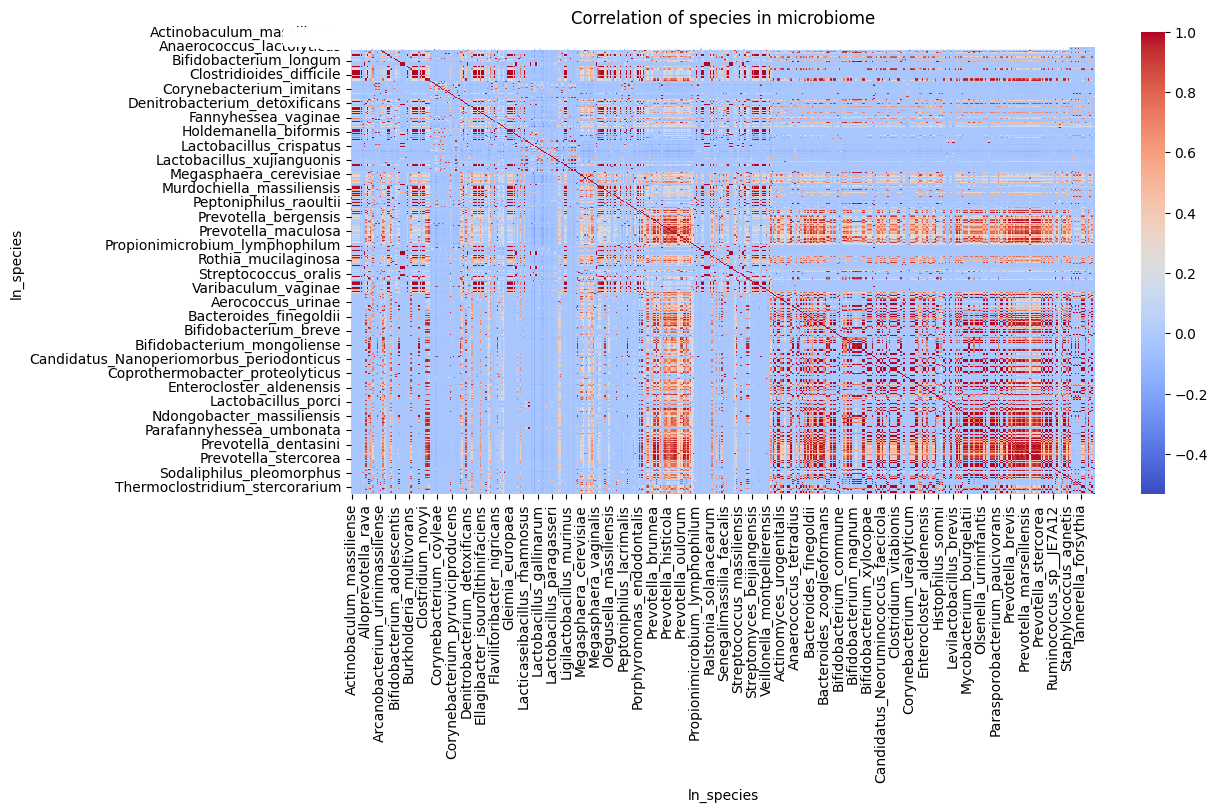

In [72]:
import numpy as np

pd.options.display.precision = 2
correlation_matrix = abundance_data.T.corr()

plt.figure(figsize=(12, 6))
ax = sns.heatmap(correlation_matrix, 
            annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of species in microbiome")

for i in correlation_matrix.index:
    for j in correlation_matrix.columns:
        text = ax.text(correlation_matrix.columns.get_loc(j) + 0.5, 
                       correlation_matrix.index.get_loc(i) + 0.5, 
                       f"{np.format_float_positional(df_corr[(df_corr["Feature_1"] == i) & (df_corr["Feature_2"] == j)]["Correlation"].values[0],
                                                     precision=2)}, p-value: {np.format_float_positional(df_corr[(df_corr["Feature_1"] == i) & 
                                                    (df_corr["Feature_2"] == j)]["p_value"].values[0], precision=3)}",
                       ha="center", va="center", color="w")
        # print(np.format_float_scientific(df_corr[(df_corr["Feature_1"] == i) & (df_corr["Feature_2"] == j)]["p_value"].values[0], precision=2))

plt.savefig("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/metagenome/correlation_heatmap.png")
plt.show()

In [42]:
species_selection = ['Lactobacillus_crispatus', 'Lactobacillus_iners', 'Lactobacillus_jensenii',
                     'Lactobacillus_gasseri', 'Gardnerella_vaginalis', 'Prevotella_bivia']
common_pathogens_v1 = {'Atopobium_vaginae', 'Escherichia_coli', 'Chlamydia_trachomatis', 
                    'Megasphaera_stantonii', 'Streptococcus_agalactiae', 'Mobiluncus_curtisii',
                    'Ureaplasma_genitalium', 'Enterococcus_faecalis', 'Mycoplasma_hominis',
                    'Mobiluncus_mulieris'}
common_pathogens = {'Escherichia_coli', 'Megasphaera_stantonii', 'Streptococcus_agalactiae', 'Mobiluncus_curtisii', 'Mycoplasma_hominis', 'Mobiluncus_mulieris'}
"""SPECIES NOT FOUND IN ANY SAMPLES: ['Ureaplasma_genitalium', 'Chlamydia_trachomatis', 'Enterococcus_faecalis', 'Atopobium_vaginae'] not in index"""
average_abundance = abundance_data.mean(axis=1)
top_species = average_abundance.nlargest(20).index.tolist()
abundance_data_T = abundance_data.T
abundance_data_filtered = abundance_data_T[top_species]

In [43]:
species_to_select = set(abundance_data_filtered.columns)
print(species_to_select.intersection(common_pathogens))
species_to_select.update(common_pathogens)
species_to_select = list(species_to_select)
print(len(common_pathogens), len(top_species), len(species_to_select))

{'Escherichia_coli'}
6 20 25


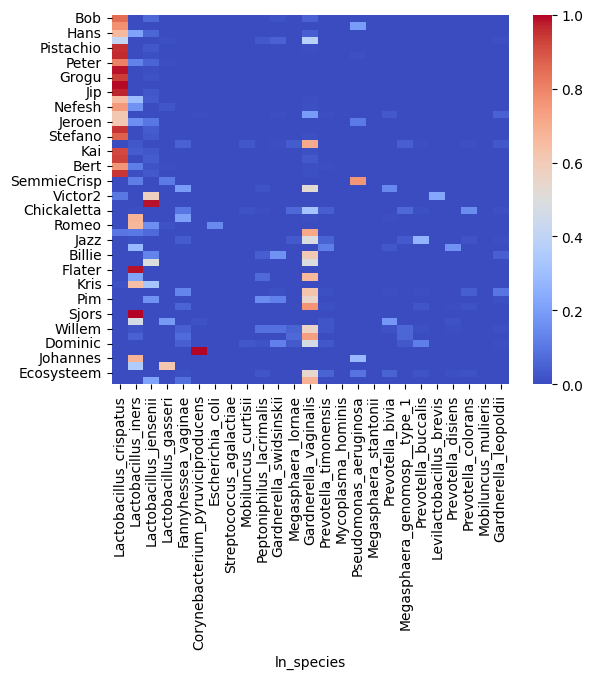

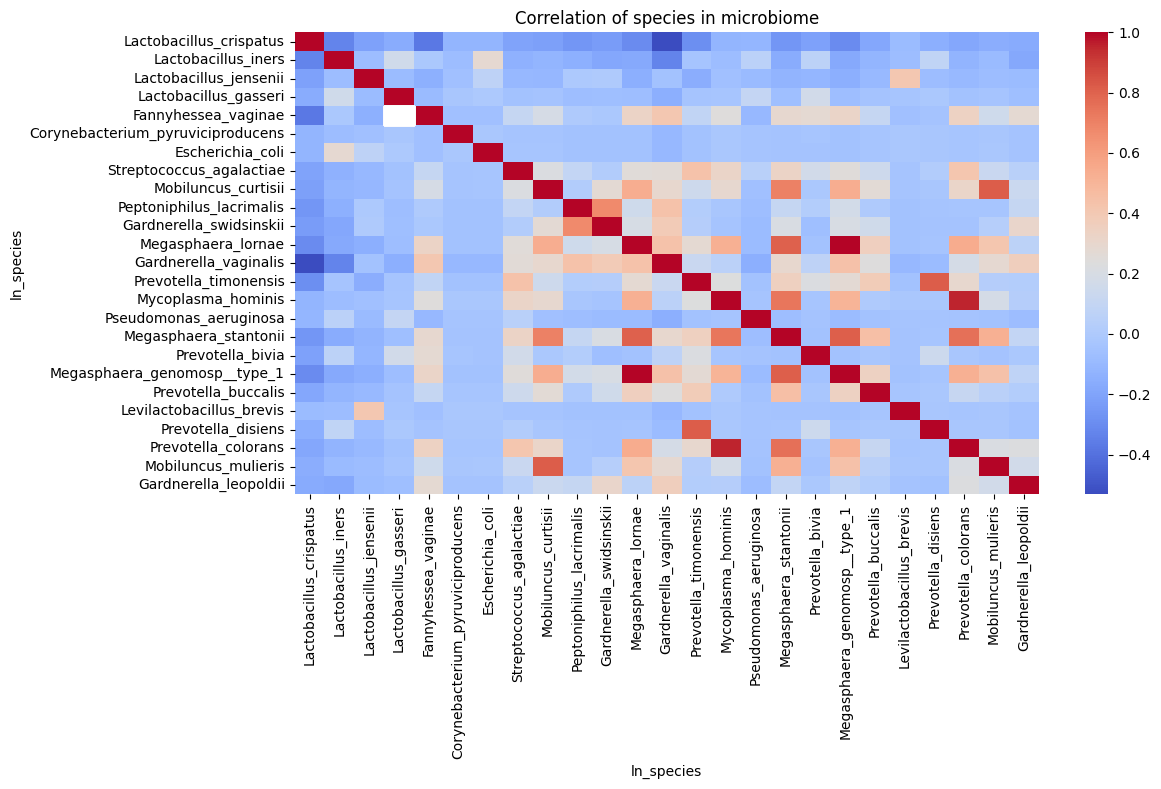

In [89]:
abundance_data_filtered = abundance_data_T[species_to_select]
abundance_data_filtered = abundance_data_filtered[['Lactobacillus_crispatus', 'Lactobacillus_iners', 'Lactobacillus_jensenii',
                     'Lactobacillus_gasseri'] + [col for col in abundance_data_filtered.columns if col not in ['Lactobacillus_crispatus', 'Lactobacillus_iners', 'Lactobacillus_jensenii',
                     'Lactobacillus_gasseri']]]
# first check distribution of species in samples
sns.heatmap(abundance_data_filtered, cmap="coolwarm")
plt.savefig("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/metagenome/distribution_heatmap.png")
plt.show()

### CORRELATION CALCULATION AND SHOWING SIGNIFICANT CORRELATIONS IN THE HEATMAP ###
df_corr = corr_annotation(abundance_data_filtered, annot=False)

plt.savefig("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/metagenome/correlation_heatmap_filtered.png")
plt.show()

In [90]:
import scipy
import numpy as np
from matplotlib.patches import Rectangle

def corr_annotation(abundance_df, annot=True):
    # Calculating correlations
    abundance_df = abundance_df
    df_corr = pd.DataFrame()
    feat1s = []
    feat2s = []
    corrs = []
    p_values = []
    
    for feat1 in abundance_df.columns:
        for feat2 in abundance_df.columns:
            # if feat1 != feat2:
            feat1s.append(feat1)
            feat2s.append(feat2)
            corr, p_value = scipy.stats.spearmanr(abundance_df[feat1], abundance_df[feat2])
            corrs.append(corr)
            p_values.append(p_value)
        # print(feat1, "done")
    
    df_corr['Feature_1'] = feat1s
    df_corr['Feature_2'] = feat2s
    df_corr['Correlation'] = corrs
    df_corr['p_value'] = p_values
    # display(df_corr)
    
    # Annotation of correlations in heatmap
    
    pd.options.display.precision = 2
    correlation_matrix = abundance_df.corr()
    
    plt.figure(figsize=(12, 6))
    ax = sns.heatmap(correlation_matrix, 
                annot=False, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation of species in microbiome")
    
    for i in correlation_matrix.index:
        for j in correlation_matrix.columns:
            if 0 != df_corr[(df_corr["Feature_1"] == i) & (df_corr["Feature_2"] == j)]["p_value"].values[0] < 0.002 and annot:
                text = ax.text(correlation_matrix.columns.get_loc(j) + 0.5, 
                               correlation_matrix.index.get_loc(i) + 0.5, 
                               f"{np.format_float_positional(df_corr[(df_corr["Feature_1"] == i) & (df_corr["Feature_2"] == j)]["Correlation"].values[0],
                                                             precision=2)}, p-value: {np.format_float_positional(df_corr[(df_corr["Feature_1"] == i) & 
                                                            (df_corr["Feature_2"] == j)]["p_value"].values[0], precision=3)}",
                               ha="center", va="center", color="w")
                print(np.format_float_scientific(df_corr[(df_corr["Feature_1"] == i) & (df_corr["Feature_2"] == j)]["p_value"].values[0], precision=2))
            else:
                ax.add_patch(Rectangle((3, 4), 1, 1, fill=True, color='w'))
    return df_corr

In [97]:
p_val_mask = df_corr["p_value"] < 0.002
corr_neg_mask, corr_pos_mask = df_corr["Correlation"] > -0.4, df_corr["Correlation"] > 0.4
display(df_corr[(df_corr["p_value"] != 0) & (p_val_mask) & (corr_neg_mask) & (corr_pos_mask)])
df_corr_filtered = df_corr[(df_corr["p_value"] != 0) & (p_val_mask) & (corr_neg_mask) & (corr_pos_mask)]
df_corr_filtered.to_excel("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/metagenome/correlation_filtered_df.xlsx")
df_corr.to_excel("/mnt/c/users/freek/Documents/BioSb/Internship/PangenomeProject/results/metagenome/correlation_df.xlsx")

,Feature_1,Feature_2,Correlation,p_value
107,Fannyhessea_vaginae,Streptococcus_agalactiae,0.60,5.08e-06
109,Fannyhessea_vaginae,Peptoniphilus_lacrimalis,0.61,2.91e-06
110,Fannyhessea_vaginae,Gardnerella_swidsinskii,0.46,8.88e-04
111,Fannyhessea_vaginae,Megasphaera_lornae,0.66,2.18e-07
112,Fannyhessea_vaginae,Gardnerella_vaginalis,0.64,4.43e-07
...,...,...,...,...
611,Gardnerella_leopoldii,Megasphaera_lornae,0.57,1.33e-05
612,Gardnerella_leopoldii,Gardnerella_vaginalis,0.61,2.82e-06
616,Gardnerella_leopoldii,Megasphaera_stantonii,0.52,1.05e-04
618,Gardnerella_leopoldii,Megasphaera_genomosp__type_1,0.57,1.34e-05
